In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from pre_process_2 import pre_processing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LayerNormalization, Dense, LSTM, Bidirectional, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [2]:
sequence_length = 15
X, y = pre_processing('Result_1h_1.csv','with_Indicator_1h_BTC_USDT.csv', sequence_length)

In [3]:
X.shape

(1215, 15, 10)

In [4]:
y_cat = to_categorical(y, num_classes=3)

In [5]:
# Build the model
model = Sequential()
model.add(LayerNormalization(input_shape=(X.shape[1], X.shape[2])))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.3))  # Regularization to prevent overfitting
model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))  # Intermediate Dense layer
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Choose an optimizer
optimizer = Adam(learning_rate=0.001)  # You can switch this to SGD, RMSprop, Nadam, etc.

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X, y_cat, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
31/31 [==============================] - 28s 414ms/step - loss: 1.0740 - accuracy: 0.5988 - val_loss: 1.0439 - val_accuracy: 0.6626
Epoch 2/50
31/31 [==============================] - 7s 227ms/step - loss: 1.0169 - accuracy: 0.6152 - val_loss: 0.9831 - val_accuracy: 0.6626
Epoch 3/50
31/31 [==============================] - 6s 185ms/step - loss: 0.9584 - accuracy: 0.6152 - val_loss: 0.9252 - val_accuracy: 0.6626
Epoch 4/50
31/31 [==============================] - 6s 208ms/step - loss: 0.9106 - accuracy: 0.6152 - val_loss: 0.8889 - val_accuracy: 0.6626
Epoch 5/50
31/31 [==============================] - 11s 345ms/step - loss: 0.8834 - accuracy: 0.6152 - val_loss: 0.8704 - val_accuracy: 0.6626
Epoch 6/50
31/31 [==============================] - 13s 412ms/step - loss: 0.8713 - accuracy: 0.6152 - val_loss: 0.8668 - val_accuracy: 0.6626
Epoch 7/50
31/31 [==============================] - 8s 270ms/step - loss: 0.8662 - accuracy: 0.6152 - val_loss: 0.8681 - val_accuracy: 0.6626
Epo

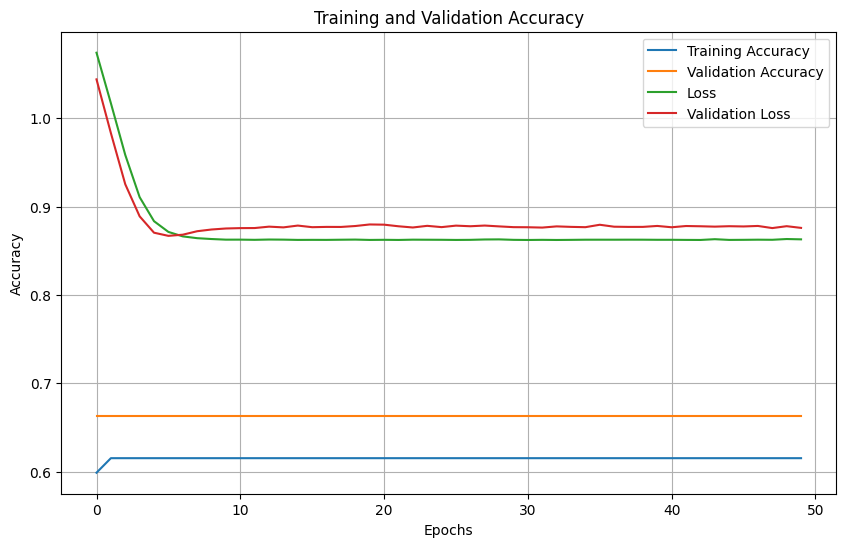

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()